# Setup

## Python Environment

In [1]:
import os
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import xarray as xr
print('All packages imported.')

# default_site = 'twp-C1'
seed = 42 # for reproducibility
print(f'Random seed set as {seed}.')

All packages imported.
Random seed set as 42.


In [2]:
# Set threshold of rainy events
prec_threshold = 0.1
print(f'Threshold of rainy event is {prec_threshold} mm/hr')

Threshold of rainy event is 0.1 mm/hr


In [3]:
# Forced library reload
%reload_ext autoreload
%autoreload 2
# %aimport utils

# Data Pre-processing

## Data Import from Pickle

In [15]:
import pickle
from utils import sample_concat

def get_save_file_path(file_name, stage=2):
    CURRENT_DIR = os.getcwd()
    DATA_DIR = f'{CURRENT_DIR}/../../data/stage-{stage}_cleaned'
    FILE_PATH = f'{DATA_DIR}/{file_name}'
    return FILE_PATH

In [6]:
streams, s_list = ['twparmbeatmC1', 'twparmbeatmC2', 'twparmbeatmC3', 'sgparmbeatmC1'], []

for stream in streams:
    with open(get_save_file_path(f'{stream}.obj.pickle'), 'rb') as handle:
        s_list.append(pickle.load(handle))

In [16]:
s = sample_concat(s_list, shuffle=True)
print(f'{s.train.size}, {s.validation.size}, {s.test.size}')

10926, 5463, 1822


## Data Standardization/Flattening

In [17]:
from utils import standardize_all, flattening_all
s = standardize_all(s)
s = flattening_all(s)

## Data Grouping

In [18]:
# for convenience
from utils import all_x, all_y

# for classification
all_data = (s.train.Xflatten, s.validation.Xflatten, np.squeeze(s.train.bin), np.squeeze(s.validation.bin))
#all_data = (train_Xflatten, valid_Xflatten, np.squeeze(train_bin), np.squeeze(valid_bin))

# Classical Classification

## Model Objectification

In [19]:
from classes import Classifier

## Common Classifiers

### K-nearest Neighbours

In [20]:
# WARNING - high-dim KNN is time-consuming
from utils_classifiers import KNN_grid_search
# KNN does not have class_weight implemented - make sense
knn = Classifier('KNN', KNN_grid_search(all_data))

KNN k=1: CV F1 macro= [0.6166] + [0.0136]
KNN k=2: CV F1 macro= [0.5831] + [0.0148]
KNN k=3: CV F1 macro= [0.6203] + [0.0124]
KNN k=4: CV F1 macro= [0.5755] + [0.0119]
KNN k=5: CV F1 macro= [0.6058] + [0.0135]
KNN k=6: CV F1 macro= [0.5634] + [0.0126]
KNN k=7: CV F1 macro= [0.5888] + [0.0128]
KNN k=8: CV F1 macro= [0.5471] + [0.0078]
KNN k=9: CV F1 macro= [0.5616] + [0.0067]
KNN k=10: CV F1 macro= [0.5401] + [0.0086]
              precision    recall  f1-score   support

       False       0.92      0.97      0.95      4946
        True       0.42      0.22      0.29       517

   micro avg       0.90      0.90      0.90      5463
   macro avg       0.67      0.59      0.62      5463
weighted avg       0.87      0.90      0.88      5463

[[4794  152]
 [ 405  112]]
AUROC= 0.5930
F1 macro= 0.6160

KNN k=3: F1 macro= 0.6160


### Logistic Regression

In [21]:
from utils_classifiers import LogReg_grid_search
logreg = Classifier('Logistic Regression', LogReg_grid_search(all_data))

L2 LogReg β=0.1: CV F1 macro= [0.5848] + [0.0081]
L2 LogReg β=0.2: CV F1 macro= [0.5854] + [0.0079]
L2 LogReg β=0.3: CV F1 macro= [0.5863] + [0.0086]
L2 LogReg β=0.4: CV F1 macro= [0.5861] + [0.0086]
L2 LogReg β=0.5: CV F1 macro= [0.5857] + [0.0090]
L2 LogReg β=0.6: CV F1 macro= [0.5858] + [0.0089]
L2 LogReg β=0.7: CV F1 macro= [0.5856] + [0.0085]
L2 LogReg β=0.8: CV F1 macro= [0.5854] + [0.0089]
L2 LogReg β=0.9: CV F1 macro= [0.5855] + [0.0081]
L2 LogReg β=1.0: CV F1 macro= [0.5850] + [0.0081]
L2 LogReg β=2.0: CV F1 macro= [0.5844] + [0.0068]
L2 LogReg β=3.0: CV F1 macro= [0.5848] + [0.0063]
L2 LogReg β=4.0: CV F1 macro= [0.5851] + [0.0066]
L2 LogReg β=5.0: CV F1 macro= [0.5852] + [0.0066]
L2 LogReg β=6.0: CV F1 macro= [0.5852] + [0.0067]
L2 LogReg β=7.0: CV F1 macro= [0.5853] + [0.0066]
L2 LogReg β=8.0: CV F1 macro= [0.5849] + [0.0066]
L2 LogReg β=9.0: CV F1 macro= [0.5847] + [0.0067]
L2 LogReg β=10.0: CV F1 macro= [0.5847] + [0.0064]
L1 LogReg β=0.1: CV F1 macro= [0.5849] + [0.0056]

/scratch/s1895566/miniconda/base/envs/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

       False       0.96      0.73      0.83      4946
        True       0.22      0.72      0.33       517

   micro avg       0.73      0.73      0.73      5463
   macro avg       0.59      0.72      0.58      5463
weighted avg       0.89      0.73      0.78      5463

[[3604 1342]
 [ 146  371]]
AUROC= 0.7231
F1 macro= 0.5808

L1 LogReg β=0.3: F1 macro= 0.5808


### Support-vector Machine

In [22]:
from utils_classifiers import SVM_grid_search
svm = Classifier('SVM', SVM_grid_search(all_data))

SVM β=0.1: CV F1 macro= [0.5598] + [0.0072]
SVM β=0.2: CV F1 macro= [0.5771] + [0.0070]
SVM β=0.3: CV F1 macro= [0.5899] + [0.0063]
SVM β=0.4: CV F1 macro= [0.5981] + [0.0057]
SVM β=0.5: CV F1 macro= [0.6032] + [0.0066]
SVM β=0.6: CV F1 macro= [0.6085] + [0.0062]
SVM β=0.7: CV F1 macro= [0.6128] + [0.0060]
SVM β=0.8: CV F1 macro= [0.6160] + [0.0050]
SVM β=0.9: CV F1 macro= [0.6194] + [0.0052]
SVM β=1.0: CV F1 macro= [0.6205] + [0.0052]
SVM β=2.0: CV F1 macro= [0.6370] + [0.0090]
SVM β=3.0: CV F1 macro= [0.6497] + [0.0088]
SVM β=4.0: CV F1 macro= [0.6530] + [0.0086]
SVM β=5.0: CV F1 macro= [0.6563] + [0.0092]
SVM β=6.0: CV F1 macro= [0.6591] + [0.0101]
SVM β=7.0: CV F1 macro= [0.6600] + [0.0091]
SVM β=8.0: CV F1 macro= [0.6604] + [0.0087]
SVM β=9.0: CV F1 macro= [0.6618] + [0.0070]
SVM β=10.0: CV F1 macro= [0.6636] + [0.0092]
              precision    recall  f1-score   support

       False       0.95      0.88      0.91      4946
        True       0.32      0.52      0.39       517


## Tree-type Classifiers

### Random Forest

In [23]:
from utils_classifiers import RandomForest_grid_search
forest = Classifier('Random Forest', RandomForest_grid_search(all_data))

              precision    recall  f1-score   support

       False       0.97      0.71      0.82      4946
        True       0.22      0.76      0.34       517

   micro avg       0.72      0.72      0.72      5463
   macro avg       0.59      0.74      0.58      5463
weighted avg       0.90      0.72      0.77      5463

[[3524 1422]
 [ 122  395]]
AUROC= 0.7383
F1 macro= 0.5794
RandomForest depth=2: F1 macro= [0.5794]
              precision    recall  f1-score   support

       False       0.97      0.74      0.84      4946
        True       0.24      0.76      0.36       517

   micro avg       0.74      0.74      0.74      5463
   macro avg       0.60      0.75      0.60      5463
weighted avg       0.90      0.74      0.79      5463

[[3666 1280]
 [ 122  395]]
AUROC= 0.7526
F1 macro= 0.5999
RandomForest depth=3: F1 macro= [0.5999]
              precision    recall  f1-score   support

       False       0.97      0.77      0.86      4946
        True       0.26      0.77      

### Bagging

In [24]:
from utils_classifiers import Bagging
# Bagging does not have class_weight implemented
bag = Classifier('Bagging', Bagging(all_data))

              precision    recall  f1-score   support

       False       0.95      0.98      0.96      4946
        True       0.72      0.51      0.60       517

   micro avg       0.93      0.93      0.93      5463
   macro avg       0.83      0.75      0.78      5463
weighted avg       0.93      0.93      0.93      5463

[[4842  104]
 [ 252  265]]
AUROC= 0.7458
F1 macro= 0.7814


### Decision Tree

In [25]:
from utils_classifiers import DecisionTree
tree = Classifier('Decision Tree', DecisionTree(all_data))

              precision    recall  f1-score   support

       False       0.94      0.95      0.95      4946
        True       0.47      0.45      0.46       517

   micro avg       0.90      0.90      0.90      5463
   macro avg       0.71      0.70      0.70      5463
weighted avg       0.90      0.90      0.90      5463

[[4685  261]
 [ 284  233]]
AUROC= 0.6990
F1 macro= 0.7030


### Extra Trees

In [26]:
from utils_classifiers import ExtraTrees
extra = Classifier('Extra Trees', ExtraTrees(all_data))

              precision    recall  f1-score   support

       False       0.91      1.00      0.95      4946
        True       0.70      0.08      0.15       517

   micro avg       0.91      0.91      0.91      5463
   macro avg       0.81      0.54      0.55      5463
weighted avg       0.89      0.91      0.88      5463

[[4928   18]
 [ 475   42]]
AUROC= 0.5388
F1 macro= 0.5490


## Boosting Classifiers

### Gradient Boosting

In [27]:
from utils_classifiers import GradB
# GradB does not have class_weight implemented
gradb = Classifier('Gradient Boosting', GradB(all_data))

              precision    recall  f1-score   support

       False       0.95      0.97      0.96      4946
        True       0.68      0.51      0.58       517

   micro avg       0.93      0.93      0.93      5463
   macro avg       0.81      0.74      0.77      5463
weighted avg       0.92      0.93      0.93      5463

[[4821  125]
 [ 254  263]]
AUROC= 0.7417
F1 macro= 0.7717


### AdaBoost

In [28]:
from utils_classifiers import AdaB
# AdaB does not have class_weight implemented
adab = Classifier('AdaBoost', AdaB(all_data))

              precision    recall  f1-score   support

       False       0.94      0.97      0.96      4946
        True       0.62      0.41      0.49       517

   micro avg       0.92      0.92      0.92      5463
   macro avg       0.78      0.69      0.72      5463
weighted avg       0.91      0.92      0.91      5463

[[4815  131]
 [ 305  212]]
AUROC= 0.6918
F1 macro= 0.7249


### XGBoost

In [29]:
from utils_classifiers import XGB
# XGB does not have class_weight implemented
xgb = Classifier('XGBoost', XGB(all_data))

              precision    recall  f1-score   support

       False       0.95      0.98      0.97      4946
        True       0.71      0.54      0.61       517

   micro avg       0.94      0.94      0.94      5463
   macro avg       0.83      0.76      0.79      5463
weighted avg       0.93      0.94      0.93      5463

[[4834  112]
 [ 238  279]]
AUROC= 0.7585
F1 macro= 0.7898


## Bayesian Classifiers

### Naïve Bayes

In [30]:
from utils_classifiers import NBayes
# NBayes does not have class_weight implemented
bayes = Classifier('Naïve Bayes', NBayes(all_data))

              precision    recall  f1-score   support

       False       0.97      0.34      0.50      4946
        True       0.13      0.91      0.22       517

   micro avg       0.39      0.39      0.39      5463
   macro avg       0.55      0.62      0.36      5463
weighted avg       0.89      0.39      0.48      5463

[[1678 3268]
 [  47  470]]
AUROC= 0.6242
F1 macro= 0.3620


### Gaussian Process

In [31]:
from utils_classifiers import GP
# GP does not have class_weight implemented
gp = Classifier('Gaussian Process', GP(all_data))

              precision    recall  f1-score   support

       False       0.93      0.96      0.94      4946
        True       0.39      0.26      0.31       517

   micro avg       0.89      0.89      0.89      5463
   macro avg       0.66      0.61      0.63      5463
weighted avg       0.87      0.89      0.88      5463

[[4732  214]
 [ 381  136]]
AUROC= 0.6099
F1 macro= 0.6273


## Majority Voting

In [32]:
models = [knn, logreg, svm, forest, bag,
          tree, extra, gradb, adab, xgb, bayes, gp]
model_summary = pd.DataFrame({'Model': [x.name for x in models],
                              'F1': [x.f1_macro for x in models]}).set_index('Model').sort_values('F1',
                                                                                                  ascending=False)
model_summary

,F1
Model,
XGBoost,0.789800
Bagging,0.781368
Gradient Boosting,0.771697
Random Forest,0.753775
AdaBoost,0.724855
Decision Tree,0.702981
SVM,0.653990
Gaussian Process,0.627287
KNN,0.615954


In [33]:
from utils_classifiers import Voting
voting = Classifier('Voting', Voting(all_data, 
                                     models=[x.classifier for x in models],
                                     model_name=[x.name for x in models], 
                                     weights=[x.f1_macro for x in models],
                                     how_to_vote='hard'))

              precision    recall  f1-score   support

       False       0.95      0.98      0.96      4946
        True       0.69      0.46      0.55       517

   micro avg       0.93      0.93      0.93      5463
   macro avg       0.82      0.72      0.76      5463
weighted avg       0.92      0.93      0.92      5463

[[4838  108]
 [ 278  239]]
AUROC= 0.7202
F1 macro= 0.7574


## Stacking

# Convolutional Neural Net

## ADASYN Oversampling

In [56]:
from classes import AugmentedSubset
from utils import Sample
aug = Sample(AugmentedSubset(s.train), s.validation, s.test)
print('1 class ratio after ADASYN= {:.2%}'.format(aug.train.class_ratio))

/scratch/s1895566/miniconda/base/envs/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1 class ratio after ADASYN= 50.21%


## Network Construction

In [57]:
from keras.models import Model
from keras.layers import Activation, BatchNormalization, Conv1D, Dense, Dropout, MaxPooling1D
from keras.layers import concatenate, Flatten, Input
from keras.optimizers import Adam
from keras.utils import plot_model
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint

from utils_nn import f1_macro_loss

Using TensorFlow backend.


In [59]:
# Input placeholders
input_conv = Input(shape=aug.train.Xvec.shape[1:], name='column_input')
input_scalar = Input(shape=(aug.train.Xscalar.shape[1],), name='surface_input')

# Hidden layers
conv_1 = Conv1D(8, kernel_size=8)(input_conv)
bn_1 = BatchNormalization()(conv_1)
pool_1 = MaxPooling1D(pool_size=2)(bn_1)
act_1 = Activation('relu')(pool_1)

conv_2 = Conv1D(2, kernel_size=4)(act_1)
bn_2 = BatchNormalization()(conv_2)
pool_2 = MaxPooling1D(pool_size=2)(bn_2)
act_2 = Activation('relu')(pool_2)

flatten_2 = Flatten()(act_2)

layer = concatenate([flatten_2, input_scalar])
#layer = Dense(4, activation='relu')(layer)

hid_3 = Dense(4,
              activation='relu')(layer)
hid_3 = Dropout(0.1)(hid_3)

output = Dense(1,
               kernel_regularizer=regularizers.l2(0.02),
               activation='sigmoid',
               name='output')(hid_3)

# 1. Initialize
model = Model(inputs=[input_conv, input_scalar], outputs=output)
to_file_path = f'nn/model_c_all.png'
plot_model(model, show_shapes=True, to_file=to_file_path)
print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
column_input (InputLayer)       (None, 37, 4)        0                                            
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 30, 8)        264         column_input[0][0]               
__________________________________________________________________________________________________
batch_normalization_3 (BatchNor (None, 30, 8)        32          conv1d_3[0][0]                   
__________________________________________________________________________________________________
max_pooling1d_3 (MaxPooling1D)  (None, 15, 8)        0           batch_normalization_3[0][0]      
__________________________________________________________________________________________________
activation

## Network Training

In [60]:
# 2. Compile
model.compile(optimizer=Adam(),
              loss=f1_macro_loss)

to_file_path = f'nn/best_model_r_all.h5'
callbacks = [EarlyStopping(monitor='loss',
                           min_delta=0,
                           patience=20,
                           verbose=0, mode='auto'),
             ModelCheckpoint(filepath=to_file_path, 
                             monitor='loss', 
                             save_best_only=True)]

In [61]:
# 3. Train
model.fit([aug.train.Xvec, aug.train.Xscalar], aug.train.bin,
          epochs=2000,
          callbacks=callbacks,
          verbose=2,
          batch_size=32, 
          validation_data=([aug.validation.Xvec, aug.validation.Xscalar], aug.validation.bin)
         )

Train on 19864 samples, validate on 5463 samples
Epoch 1/2000
 - 5s - loss: 0.3716 - val_loss: 0.5131
Epoch 2/2000
 - 3s - loss: 0.2882 - val_loss: 0.4769
Epoch 3/2000
 - 3s - loss: 0.2690 - val_loss: 0.4843
Epoch 4/2000
 - 3s - loss: 0.2610 - val_loss: 0.4563
Epoch 5/2000
 - 3s - loss: 0.2514 - val_loss: 0.4483
Epoch 6/2000
 - 3s - loss: 0.2460 - val_loss: 0.4363
Epoch 7/2000
 - 3s - loss: 0.2393 - val_loss: 0.4383
Epoch 8/2000
 - 3s - loss: 0.2329 - val_loss: 0.4352
Epoch 9/2000
 - 3s - loss: 0.2293 - val_loss: 0.4479
Epoch 10/2000
 - 3s - loss: 0.2277 - val_loss: 0.4477
Epoch 11/2000
 - 3s - loss: 0.2245 - val_loss: 0.4299
Epoch 12/2000
 - 3s - loss: 0.2207 - val_loss: 0.4355
Epoch 13/2000
 - 3s - loss: 0.2153 - val_loss: 0.4279
Epoch 14/2000
 - 3s - loss: 0.2148 - val_loss: 0.4443
Epoch 15/2000
 - 3s - loss: 0.2135 - val_loss: 0.4164
Epoch 16/2000
 - 3s - loss: 0.2099 - val_loss: 0.4405
Epoch 17/2000
 - 3s - loss: 0.2106 - val_loss: 0.4228
Epoch 18/2000
 - 3s - loss: 0.2078 - val_l

 - 3s - loss: 0.1386 - val_loss: 0.3708
Epoch 152/2000
 - 3s - loss: 0.1383 - val_loss: 0.4030
Epoch 153/2000
 - 3s - loss: 0.1385 - val_loss: 0.3698
Epoch 154/2000
 - 3s - loss: 0.1364 - val_loss: 0.3726
Epoch 155/2000
 - 3s - loss: 0.1361 - val_loss: 0.3704
Epoch 156/2000
 - 3s - loss: 0.1363 - val_loss: 0.3814
Epoch 157/2000
 - 3s - loss: 0.1366 - val_loss: 0.3614
Epoch 158/2000
 - 3s - loss: 0.1369 - val_loss: 0.3800
Epoch 159/2000
 - 3s - loss: 0.1380 - val_loss: 0.3763
Epoch 160/2000
 - 3s - loss: 0.1364 - val_loss: 0.3620
Epoch 161/2000
 - 3s - loss: 0.1380 - val_loss: 0.3672
Epoch 162/2000
 - 3s - loss: 0.1356 - val_loss: 0.3772
Epoch 163/2000
 - 3s - loss: 0.1342 - val_loss: 0.4013
Epoch 164/2000
 - 3s - loss: 0.1367 - val_loss: 0.3796
Epoch 165/2000
 - 3s - loss: 0.1347 - val_loss: 0.3593
Epoch 166/2000
 - 3s - loss: 0.1357 - val_loss: 0.3694
Epoch 167/2000
 - 3s - loss: 0.1331 - val_loss: 0.3687
Epoch 168/2000
 - 3s - loss: 0.1346 - val_loss: 0.3644
Epoch 169/2000
 - 3s - lo

 - 3s - loss: 0.1209 - val_loss: 0.3631
Epoch 301/2000
 - 3s - loss: 0.1233 - val_loss: 0.3757
Epoch 302/2000
 - 3s - loss: 0.1224 - val_loss: 0.3693
Epoch 303/2000
 - 3s - loss: 0.1227 - val_loss: 0.3717
Epoch 304/2000
 - 3s - loss: 0.1224 - val_loss: 0.3611
Epoch 305/2000
 - 3s - loss: 0.1225 - val_loss: 0.3647
Epoch 306/2000
 - 3s - loss: 0.1207 - val_loss: 0.3682
Epoch 307/2000
 - 3s - loss: 0.1218 - val_loss: 0.3847
Epoch 308/2000
 - 3s - loss: 0.1217 - val_loss: 0.3711
Epoch 309/2000
 - 3s - loss: 0.1214 - val_loss: 0.3680
Epoch 310/2000
 - 3s - loss: 0.1219 - val_loss: 0.3679
Epoch 311/2000
 - 3s - loss: 0.1225 - val_loss: 0.3627
Epoch 312/2000
 - 3s - loss: 0.1200 - val_loss: 0.3689
Epoch 313/2000
 - 3s - loss: 0.1212 - val_loss: 0.3661
Epoch 314/2000
 - 3s - loss: 0.1198 - val_loss: 0.3780
Epoch 315/2000
 - 3s - loss: 0.1200 - val_loss: 0.3667
Epoch 316/2000
 - 3s - loss: 0.1210 - val_loss: 0.3674
Epoch 317/2000
 - 3s - loss: 0.1200 - val_loss: 0.3668
Epoch 318/2000
 - 3s - lo

## Testing

In [62]:
from utils_classifiers import reports

aug.validation.bin_hat = model.predict([aug.validation.Xvec, aug.validation.Xscalar]) >= 0.5
_ = (reports(aug.validation.bin, aug.validation.bin_hat))

              precision    recall  f1-score   support

       False       0.96      0.88      0.92      4946
        True       0.34      0.62      0.44       517

   micro avg       0.85      0.85      0.85      5463
   macro avg       0.65      0.75      0.68      5463
weighted avg       0.90      0.85      0.87      5463

[[4340  606]
 [ 199  318]]
AUROC= 0.7463
F1 macro= 0.6782


# Classifier Selection

## Double-check using Test Subsample

In [63]:
# Find the optimal model (argmax in Python list)
f = lambda i:models[i].f1_macro
opt_model = models[max(range(len(models)), key=f)]

In [64]:
from utils_classifiers import reports
s.test.bin_hat = opt_model.classifier.predict(s.test.Xflatten)
reports(s.test.bin, s.test.bin_hat)

              precision    recall  f1-score   support

       False       0.95      0.98      0.96      1648
        True       0.73      0.51      0.60       174

   micro avg       0.93      0.93      0.93      1822
   macro avg       0.84      0.74      0.78      1822
weighted avg       0.93      0.93      0.93      1822

[[1615   33]
 [  86   88]]
AUROC= 0.7429
F1 macro= 0.7805


0.7805385872838337

## Plot

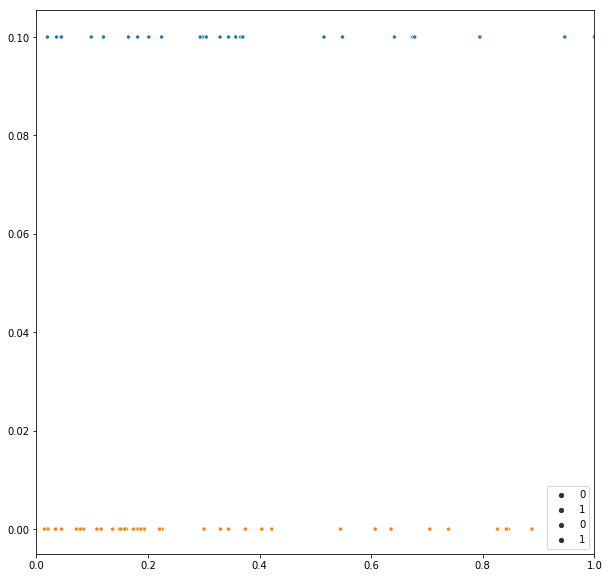

In [65]:
x1, x2 = s.test.y[s.test.bin_hat == 1][:,0], s.test.y[s.test.bin_hat == 0][:,0]

plt.figure(figsize=(10, 10))
axes = plt.gca()
axes.set_xlim([0,1])

sns.scatterplot(x1, np.zeros(x1.size)+.1, size=1)
sns.scatterplot(x2, np.zeros(x2.size), size=1)

plt.show()

# Classical Regression

## Data Extraction

In [66]:
from classes import Sample, SampleSubset

In [67]:
s.validation.bin_hat = opt_model.classifier.predict(s.validation.Xflatten)
mask = s.validation.bin_hat
s_post_valid = SampleSubset(s.validation.bin[mask,:], s.validation.y[mask,:], s.validation.Xscalar[mask,:], s.validation.Xvec[mask,:,:],
                           Xflatten=s.validation.Xflatten[mask,:], Xboundary=s.validation.Xboundary)

mask = s.test.bin_hat
s_post_test = SampleSubset(s.test.bin[mask,:], s.test.y[mask,:], s.test.Xscalar[mask,:], s.test.Xvec[mask,:,:],
                          Xflatten=s.test.Xflatten[mask,:], Xboundary=s.test.Xboundary)

s_post = Sample(None, s_post_valid, s_post_test, scaler=s.scaler)

In [68]:
from classes import Regressor
sel_data = [s_post.validation.Xflatten, s_post.test.Xflatten,
            np.squeeze(s_post.validation.y), np.squeeze(s_post.test.y)]

In [69]:
[x.shape for x in sel_data]

[(391, 154), (121, 154), (391,), (121,)]

### Y Shift (+ve) for RMSLE

In [70]:
# shift all inputs for 
pos_shift = [-x.min() + 1 + np.finfo(np.float32).eps for x in sel_data[2:]] 
sel_pos_data = sel_data[:2] + [x + shift for x, shift in zip(sel_data[2:], pos_shift)]

## Common Regressors

### KNN

In [71]:
from utils_regressors import KNNReg
knn_reg = Regressor('KNN Regression', KNNReg(sel_pos_data))

0.115241416


/scratch/s1895566/miniconda/base/envs/venv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Linear Regression

### Support-vector Machine

### Random Forest

In [72]:
from utils_regressors import RFR
rfr = Regressor('Random Forest', RFR(sel_pos_data))

/scratch/s1895566/miniconda/base/envs/venv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/scratch/s1895566/miniconda/base/envs/venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.15058231045834913


### Bagging

In [73]:
from utils_regressors import BagReg
bag_reg = Regressor('Bagging', BagReg(sel_pos_data))

0.16510702169616573


## Performance

### Validation (fit) Error

In [74]:
models_reg = [knn_reg, rfr, bag_reg]
f = lambda i:models_reg[i].mse
opt_model_reg = models_reg[min(range(len(models_reg)), key=f)]
opt_model_reg.name

'KNN Regression'

In [75]:
s.validation.y_hat = opt_model_reg.regressor.predict(s.validation.Xflatten) - pos_shift[0]
labels = s.scaler.y.inverse_transform(s.validation.y)
outputs = s.scaler.y.inverse_transform(s.validation.y_hat)

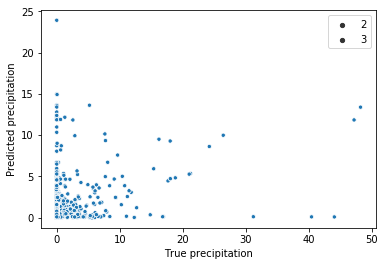

In [76]:
sns.scatterplot(np.squeeze(labels), np.squeeze(outputs), size=3)
plt.xlabel('True precipitation')
plt.ylabel('Predicted precipitation')
plt.show()

### Test Error

In [77]:
s.test.y_hat = opt_model_reg.regressor.predict(s.test.Xflatten) - pos_shift[1]
labels = s.scaler.y.inverse_transform(s.test.y)
outputs = s.scaler.y.inverse_transform(s.test.y_hat)

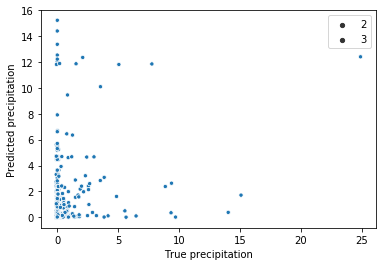

In [78]:
sns.scatterplot(np.squeeze(labels), np.squeeze(outputs), size=3)
plt.xlabel('True precipitation')
plt.ylabel('Predicted precipitation')
plt.show()

# Convolutional Neural Net

In [79]:
print('1 class ratio after ADASYN= {:.2%}'.format(s_post.validation.class_ratio))
# ideally 100%

1 class ratio after ADASYN= 71.36%


## Network Construction

In [87]:
s_post.validation.Xvec.shape[0]

391

In [80]:
# Input placeholders
input_conv = Input(shape=s_post.validation.Xvec.shape[1:], name='column_input')
input_scalar = Input(shape=(s_post.validation.Xscalar.shape[1],), name='surface_input')

# Hidden layers
conv_1 = Conv1D(1, kernel_size=8)(input_conv)
bn_1 = BatchNormalization()(conv_1)
pool_1 = MaxPooling1D(pool_size=2)(bn_1)
act_1 = Activation('relu')(pool_1)

conv_2 = Conv1D(1, kernel_size=4)(act_1)
bn_2 = BatchNormalization()(conv_2)
pool_2 = MaxPooling1D(pool_size=2)(bn_2)
act_2 = Activation('relu')(pool_2)

flatten_2 = Flatten()(act_2)

layer = concatenate([flatten_2, input_scalar])
#layer = Dense(4, activation='relu')(layer)

hid_3 = Dense(2,
              activation='relu')(layer)
hid_3 = Dropout(0.1)(hid_3)

output = Dense(1,
               kernel_regularizer=regularizers.l2(0.02),
               name='output')(hid_3)

# 1. Initialize
model_reg = Model(inputs=[input_conv, input_scalar], outputs=output)
to_file_path = f'nn/model_r_all.png'
plot_model(model_reg, show_shapes=True, to_file=to_file_path)
print(model_reg.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
column_input (InputLayer)       (None, 37, 4)        0                                            
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 30, 1)        33          column_input[0][0]               
__________________________________________________________________________________________________
batch_normalization_5 (BatchNor (None, 30, 1)        4           conv1d_5[0][0]                   
__________________________________________________________________________________________________
max_pooling1d_5 (MaxPooling1D)  (None, 15, 1)        0           batch_normalization_5[0][0]      
__________________________________________________________________________________________________
activation

## Network Training

In [81]:
# 2. Compile
model_reg.compile(optimizer=Adam(),
                  loss='mean_squared_logarithmic_error')

to_file_path = f'nn/best_model_r_all.h5'
callbacks = [EarlyStopping(monitor='loss',
                           min_delta=0,
                           patience=40,
                           verbose=0, mode='auto'),
             ModelCheckpoint(filepath=to_file_path, 
                             monitor='loss', 
                             save_best_only=True)]

In [82]:
# 3. Train
model_reg.fit([s_post.validation.Xvec, s_post.validation.Xscalar], s_post.validation.y,
          epochs=2000,
          callbacks=callbacks,
          verbose=2,
          batch_size=32, 
          validation_data=([s_post.test.Xvec, s_post.test.Xscalar], s_post.test.y)
         )

Train on 391 samples, validate on 121 samples
Epoch 1/2000
 - 2s - loss: 0.4597 - val_loss: 0.2837
Epoch 2/2000
 - 0s - loss: 0.4369 - val_loss: 0.2535
Epoch 3/2000
 - 0s - loss: 0.4353 - val_loss: 0.2301
Epoch 4/2000
 - 0s - loss: 0.4181 - val_loss: 0.2131
Epoch 5/2000
 - 0s - loss: 0.3950 - val_loss: 0.1993
Epoch 6/2000
 - 0s - loss: 0.3882 - val_loss: 0.1879
Epoch 7/2000
 - 0s - loss: 0.3822 - val_loss: 0.1748
Epoch 8/2000
 - 0s - loss: 0.3776 - val_loss: 0.1630
Epoch 9/2000
 - 0s - loss: 0.3640 - val_loss: 0.1544
Epoch 10/2000
 - 0s - loss: 0.3586 - val_loss: 0.1485
Epoch 11/2000
 - 0s - loss: 0.3666 - val_loss: 0.1393
Epoch 12/2000
 - 0s - loss: 0.3710 - val_loss: 0.1332
Epoch 13/2000
 - 0s - loss: 0.3477 - val_loss: 0.1290
Epoch 14/2000
 - 0s - loss: 0.3420 - val_loss: 0.1276
Epoch 15/2000
 - 0s - loss: 0.3560 - val_loss: 0.1245
Epoch 16/2000
 - 0s - loss: 0.3488 - val_loss: 0.1223
Epoch 17/2000
 - 0s - loss: 0.3413 - val_loss: 0.1214
Epoch 18/2000
 - 0s - loss: 0.3415 - val_loss

 - 0s - loss: 0.2906 - val_loss: 0.0903
Epoch 152/2000
 - 0s - loss: 0.2976 - val_loss: 0.0904
Epoch 153/2000
 - 0s - loss: 0.2983 - val_loss: 0.0903
Epoch 154/2000
 - 0s - loss: 0.3073 - val_loss: 0.0888
Epoch 155/2000
 - 0s - loss: 0.2877 - val_loss: 0.0901
Epoch 156/2000
 - 0s - loss: 0.2974 - val_loss: 0.0900
Epoch 157/2000
 - 0s - loss: 0.2863 - val_loss: 0.0907
Epoch 158/2000
 - 0s - loss: 0.2965 - val_loss: 0.0900
Epoch 159/2000
 - 0s - loss: 0.2959 - val_loss: 0.0899
Epoch 160/2000
 - 0s - loss: 0.2951 - val_loss: 0.0910
Epoch 161/2000
 - 0s - loss: 0.2966 - val_loss: 0.0906
Epoch 162/2000
 - 0s - loss: 0.3004 - val_loss: 0.0902
Epoch 163/2000
 - 0s - loss: 0.2995 - val_loss: 0.0908
Epoch 164/2000
 - 0s - loss: 0.2865 - val_loss: 0.0914
Epoch 165/2000
 - 0s - loss: 0.3010 - val_loss: 0.0919
Epoch 166/2000
 - 0s - loss: 0.2920 - val_loss: 0.0899
Epoch 167/2000
 - 0s - loss: 0.2925 - val_loss: 0.0894
Epoch 168/2000
 - 0s - loss: 0.2971 - val_loss: 0.0891
Epoch 169/2000
 - 0s - lo

## Testing

### Validation Error

In [83]:
s_post.validation.y_hat = model_reg.predict([s_post.validation.Xvec, s_post.validation.Xscalar])
labels = s.scaler.y.inverse_transform(s_post.validation.y)
outputs = s.scaler.y.inverse_transform(s_post.validation.y_hat)

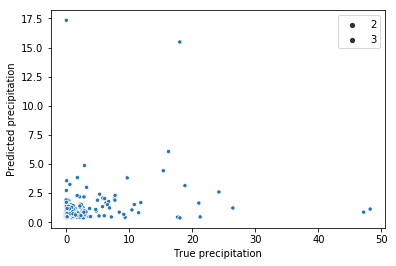

In [84]:
sns.scatterplot(np.squeeze(labels), np.squeeze(outputs), size=3)
plt.xlabel('True precipitation')
plt.ylabel('Predicted precipitation')
plt.show()

### Test Error

In [85]:
s_post.test.y_hat = model_reg.predict([s_post.test.Xvec, s_post.test.Xscalar])
labels = s.scaler.y.inverse_transform(s_post.test.y)
outputs = s.scaler.y.inverse_transform(s_post.test.y_hat)

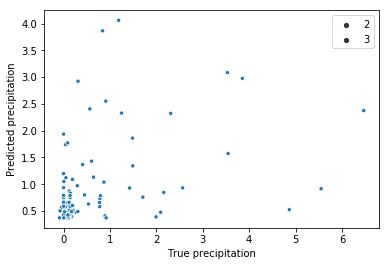

In [86]:
sns.scatterplot(np.squeeze(labels), np.squeeze(outputs), size=3)
plt.xlabel('True precipitation')
plt.ylabel('Predicted precipitation')
plt.show()